In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from tqdm import tqdm

np.__version__,pd.__version__,sklearn.__version__,matplotlib.__version__

('1.20.3', '1.3.3', '0.24.2', '3.4.2')

In [2]:
# Dataset capturado do desafio https://www.kaggle.com/volodymyrgavrysh/fraud-detection-bank-dataset-20k-records-binary
df = pd.read_csv('../data/fraud_detection_bank_dataset.csv',index_col=0)



In [3]:
df.iloc[:,:-1].describe().T.sample(30) # Existem um grande problema de escala entre as caracteristicas deste dataset

,count,mean,std,min,25%,50%,75%,max
col_21,20468.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
col_91,20468.0,0.000391,0.019767,0.0,0.0,0.0,0.0,1.0
col_15,20468.0,0.330760,0.470498,0.0,0.0,0.0,1.0,1.0
col_36,20468.0,17.981776,675.933608,0.0,0.0,0.0,4.0,94642.0
col_13,20468.0,0.038646,0.192754,0.0,0.0,0.0,0.0,1.0
col_41,20468.0,0.608315,4.202274,0.0,0.0,0.0,0.0,254.0
col_49,20468.0,23.753225,345.441008,0.0,0.0,0.0,5.0,41900.0
col_96,20468.0,0.211061,0.408072,0.0,0.0,0.0,0.0,1.0
col_102,20468.0,0.365595,0.558812,0.0,0.0,0.0,1.0,20.0
col_84,20468.0,0.022230,0.147434,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

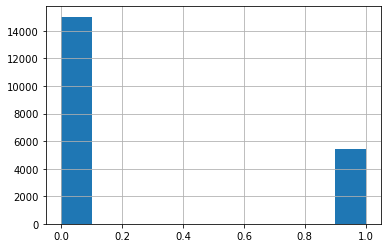

In [4]:
# Verificando se o dataset é balanceado em suas respostas.
# Este dataset possui proporção de 3 classes "zero" (não é fraude) para cada 1 classe um (fraude)
df.targets.hist()

__________________________________________________________________________________
# Experimento1: Primeira Estratégia - Fazer GridSearchCV nos parametros do pipeline com StandardScaler() e classificadores KNN e LogisticRegressor
__________________________________________________________________________________

In [5]:
# Definição do pipeline KNN
pipe_knn = Pipeline([
                    ('scaler', StandardScaler()),
                    ('knn', KNeighborsClassifier())
                ])

# Definição do pipeline LogisticRegressor
pipe_logreg = Pipeline([
                    ('scaler', StandardScaler()),
                    ('logreg', LogisticRegression())
                ])

In [6]:
print(pipe_knn.get_params().keys(),'\n')
print(pipe_logreg.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'knn', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'knn__algorithm', 'knn__leaf_size', 'knn__metric', 'knn__metric_params', 'knn__n_jobs', 'knn__n_neighbors', 'knn__p', 'knn__weights']) 

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'logreg', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'logreg__C', 'logreg__class_weight', 'logreg__dual', 'logreg__fit_intercept', 'logreg__intercept_scaling', 'logreg__l1_ratio', 'logreg__max_iter', 'logreg__multi_class', 'logreg__n_jobs', 'logreg__penalty', 'logreg__random_state', 'logreg__solver', 'logreg__tol', 'logreg__verbose', 'logreg__warm_start'])


In [7]:
# Escolha dos parametros de GridSearchCV para o KNN
param_gscv_knn = {
                    'knn__n_neighbors':list(range(1,8,2)) # Escolha do K
                 } 

# Escolha dos parametros de GridSearchCV para o LogisticRegressor
param_gscv_logreg = {
                      'logreg__C': [0.9,1.0,1.1,1.2,1.3], # Escolha do fator de regulaziração para evitar overfiting
                      'logreg__class_weight': ['balanced',None], # Escolha da estratégia de balanceamento dos presos das classes
                      'logreg__max_iter': [1000] # Máximo de iterações
                    }

In [8]:
# O GridSearchCV foi ajustado no scoring para "balanced_accuracy",
# a fim de buscar melhores hiperparametros para balanceamento das classes.
model_knn = GridSearchCV(pipe_knn,param_grid=param_gscv_knn,cv=5,scoring='balanced_accuracy',
                     refit='balanced_accuracy',return_train_score=True,n_jobs=5)

model_logreg = GridSearchCV(pipe_logreg,param_grid=param_gscv_logreg,cv=5,scoring='balanced_accuracy',
                     refit='balanced_accuracy',return_train_score=True,n_jobs=5)

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
splits = []

## Loop com 10 execuções em diferentes splits
for i in np.random.randint(1,1000,size=10):
    rand_st = i

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=rand_st) # Deixa 33% dos dados para o teste final do classificador

    splits.append([i,X_train, X_test, y_train, y_test])

In [10]:
%%time
results = []
for split in tqdm(splits):
    rand_st = split[0]
    X_train, X_test, y_train, y_test = split[1:]
    gscv_knn_results = cross_validate(model_knn,X_train,y_train,cv=StratifiedKFold(5,shuffle=True, random_state=rand_st),
                             return_train_score=True,return_estimator=True,scoring='balanced_accuracy')

    gscv_logreg_results = cross_validate(model_logreg,X_train,y_train,cv=StratifiedKFold(5,shuffle=True, random_state=rand_st),
                             return_train_score=True,return_estimator=True,scoring='balanced_accuracy')
    
    best_knn = gscv_knn_results['estimator'][np.argmax(gscv_knn_results['test_score'])].best_estimator_
    best_logreg = gscv_logreg_results['estimator'][np.argmax(gscv_logreg_results['test_score'])].best_estimator_
    
    y_pred_knn = best_knn.predict(X_test)
    y_pred_logreg = best_logreg.predict(X_test)
    
    acc_bal_knn,acc_knn = balanced_accuracy_score(y_test,y_pred_knn), accuracy_score(y_test,y_pred_knn)
    acc_bal_logreg,acc_logreg = balanced_accuracy_score(y_test,y_pred_logreg), accuracy_score(y_test,y_pred_logreg)
    
    
    results.append([acc_bal_knn,acc_knn,acc_bal_logreg,acc_logreg,
                    rand_st,split[1:],gscv_knn_results,gscv_logreg_results,best_knn,best_logreg])

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [21:41<00:00, 130.10s/it]

Wall time: 21min 41s


In [11]:
df_results_exp1 = []
for i in results:
    df_results_exp1.append([i[4],i[0],i[1],np.mean(i[6]['test_score']),np.mean(i[6]['train_score']),
                                 i[2],i[3],np.mean(i[7]['test_score']),np.mean(i[7]['train_score'])])

df_results_exp1 = pd.DataFrame(df_results_exp1,columns=['randon_state',
                                 'final_test_balanced_accuracy_knn','final_test_accuracy_knn',
                                 'mean_valid_balanced_accuracy_knn','mean_train_balanced_accuracy_knn',
                                 'final_test_balanced_accuracy_logreg','final_test_accuracy_logreg',
                                 'mean_valid_balanced_accuracy_logreg','mean_train_balanced_accuracy_logreg'
                                ])

df_results_exp1.describe().T

,count,mean,std,min,25%,50%,75%,max
randon_state,10.0,711.500000,96.878217,553.000000,661.500000,708.000000,771.000000,892.000000
final_test_balanced_accuracy_knn,10.0,0.860094,0.003430,0.853701,0.858180,0.860070,0.862200,0.864620
final_test_accuracy_knn,10.0,0.896743,0.003263,0.893116,0.893671,0.896743,0.899112,0.902147
mean_valid_balanced_accuracy_knn,10.0,0.859732,0.003206,0.857052,0.857456,0.858194,0.861506,0.866948
mean_train_balanced_accuracy_knn,10.0,0.911081,0.005744,0.898489,0.908039,0.911819,0.915676,0.917225
final_test_balanced_accuracy_logreg,10.0,0.875027,0.003741,0.868695,0.872077,0.876092,0.877541,0.880441
final_test_accuracy_logreg,10.0,0.877084,0.004534,0.870466,0.873760,0.876832,0.878942,0.885418
mean_valid_balanced_accuracy_logreg,10.0,0.871546,0.003187,0.866580,0.869754,0.871432,0.873332,0.877909
mean_train_balanced_accuracy_logreg,10.0,0.876580,0.003218,0.872020,0.875372,0.876319,0.877519,0.882785


### Exemplo de resultado do ultimo pipeline treinado

In [12]:
model = results[-1][8]
results[-1][8]

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [13]:
y_pred = model.predict(X_test)

In [14]:
balanced_accuracy_score(y_test,y_pred), accuracy_score(y_test,y_pred)

(0.8594063216348552, 0.8981495188749075)

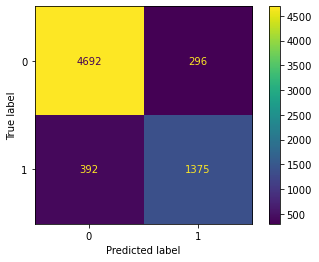

In [15]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [16]:
model = results[-1][9]
results[-1][9]

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=1.2, class_weight='balanced',
                                    max_iter=1000))])

In [17]:
y_pred = model.predict(X_test)

In [18]:
balanced_accuracy_score(y_test,y_pred), accuracy_score(y_test,y_pred)

(0.8782172857188888, 0.8827535159141376)

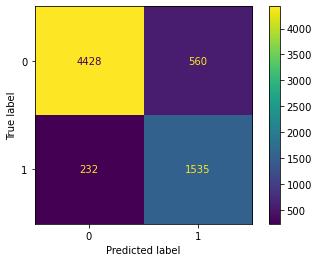

In [19]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

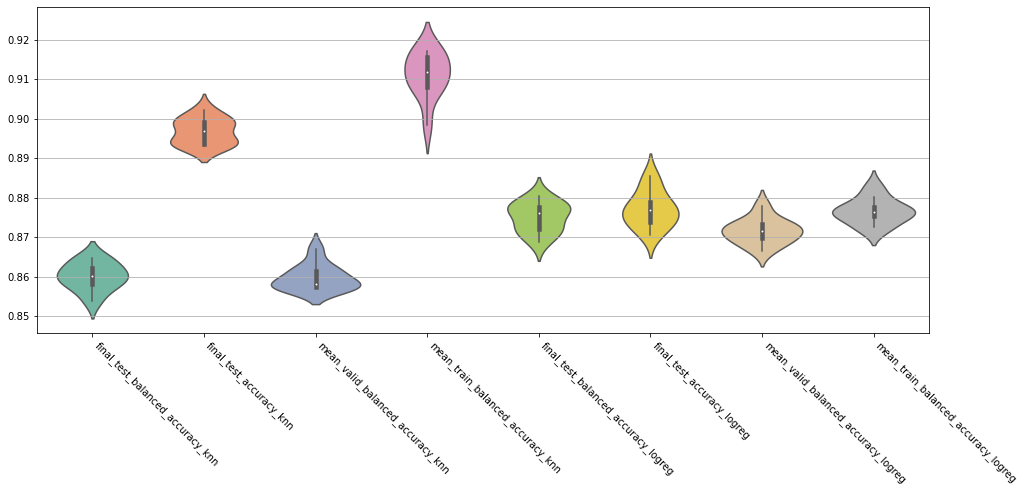

In [20]:
fig, axes = plt.subplots(figsize=(16,6))
sns.violinplot(data=df_results_exp1.iloc[:,1:], palette="Set2", split=True,  ax=axes)

axes.yaxis.grid(True)
void = plt.xticks(rotation=-45,ha="left")

__________________________________________________________________________________
# Experimento 2: Segunda Estratégia - Fazer o pipeline com o StandardScaler + GridSearchCV  para classificadores KNN e LogisticRegressor

### ***Segundo videoaulas, esta abordagem possui um viés de erro, pois o StandardScaler() irá treinar com todas as amostras de treino e validação antes da entrada no GridSearchCV(), gerando um viés no pipeline e um possível resultado mascarado que pode levar a resultados inconsistentes no teste final se os dados divergirem em média e desvio padrão significativamente das amostras de treino e validação***
__________________________________________________________________________________

In [21]:
print(KNeighborsClassifier().get_params().keys(),'\n')
print(LogisticRegression().get_params().keys())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']) 

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [22]:
# Escolha dos parametros de GridSearchCV para o KNN
param_gscv_knn = {
                    'n_neighbors':list(range(1,8,2)) # Escolha do K
                 } 

# Escolha dos parametros de GridSearchCV para o LogisticRegressor
param_gscv_logreg = {
                      'C': [0.9,1.0,1.1,1.2,1.3], # Escolha do fator de regulaziração para evitar overfiting
                      'class_weight': ['balanced',None], # Escolha da estratégia de balanceamento dos presos das classes
                      'max_iter': [1000] # Máximo de iterações
                    }

In [23]:
# Definição do pipeline KNN
pipe_knn = Pipeline([
                    ('scaler', StandardScaler()),
                    # O GridSearchCV foi ajustado no scoring para "balanced_accuracy",
                    # a fim de buscar melhores hiperparametros para balanceamento das classes.
                    ('knn',GridSearchCV(KNeighborsClassifier(),param_grid=param_gscv_knn,cv=5,scoring='balanced_accuracy',
                                    refit='balanced_accuracy',return_train_score=True,n_jobs=5))
                ])

# Definição do pipeline LogisticRegressor
pipe_logreg = Pipeline([
                    ('scaler', StandardScaler()),
                    # O GridSearchCV foi ajustado no scoring para "balanced_accuracy",
                    # a fim de buscar melhores hiperparametros para balanceamento das classes.
                    ('logreg', GridSearchCV(LogisticRegression(),param_grid=param_gscv_logreg,cv=5,scoring='balanced_accuracy',
                                    refit='balanced_accuracy',return_train_score=True,n_jobs=5))
                ])

In [24]:
model_knn = pipe_knn

model_logreg = pipe_logreg

In [25]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
splits = []

## Loop com 10 execuções em diferentes splits
for i in np.random.randint(1,1000,size=10):
    rand_st = i

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=rand_st) # Deixa 33% dos dados para o teste final do classificador

    splits.append([i,X_train, X_test, y_train, y_test])

In [26]:
%%time
results = []
for split in tqdm(splits):
    rand_st = split[0]
    X_train, X_test, y_train, y_test = split[1:]
    gscv_knn_results = cross_validate(model_knn,X_train,y_train,cv=StratifiedKFold(5,shuffle=True, random_state=rand_st),
                             return_train_score=True,return_estimator=True,scoring='balanced_accuracy')

    gscv_logreg_results = cross_validate(model_logreg,X_train,y_train,cv=StratifiedKFold(5,shuffle=True, random_state=rand_st),
                             return_train_score=True,return_estimator=True,scoring='balanced_accuracy')
    
    best_knn = gscv_knn_results['estimator'][np.argmax(gscv_knn_results['test_score'])]#.best_estimator_
    best_logreg = gscv_logreg_results['estimator'][np.argmax(gscv_logreg_results['test_score'])]#.best_estimator_
    
    y_pred_knn = best_knn.predict(X_test)
    y_pred_logreg = best_logreg.predict(X_test)
    
    acc_bal_knn,acc_knn = balanced_accuracy_score(y_test,y_pred_knn), accuracy_score(y_test,y_pred_knn)
    acc_bal_logreg,acc_logreg = balanced_accuracy_score(y_test,y_pred_logreg), accuracy_score(y_test,y_pred_logreg)
    
    
    results.append([acc_bal_knn,acc_knn,acc_bal_logreg,acc_logreg,
                    rand_st,split[1:],gscv_knn_results,gscv_logreg_results,best_knn,best_logreg])

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [22:29<00:00, 135.00s/it]

Wall time: 22min 30s


In [27]:
df_results_exp2 = []
for i in results:
    df_results_exp2.append([i[4],i[0],i[1],np.mean(i[6]['test_score']),np.mean(i[6]['train_score']),
                                 i[2],i[3],np.mean(i[7]['test_score']),np.mean(i[7]['train_score'])])

df_results_exp2 = pd.DataFrame(df_results_exp2,columns=['randon_state',
                                 'final_test_balanced_accuracy_knn','final_test_accuracy_knn',
                                 'mean_valid_balanced_accuracy_knn','mean_train_balanced_accuracy_knn',
                                 'final_test_balanced_accuracy_logreg','final_test_accuracy_logreg',
                                 'mean_valid_balanced_accuracy_logreg','mean_train_balanced_accuracy_logreg'
                                ])

df_results_exp2.describe().T

,count,mean,std,min,25%,50%,75%,max
randon_state,10.0,460.600000,335.660278,45.000000,178.750000,426.500000,651.250000,977.000000
final_test_balanced_accuracy_knn,10.0,0.856986,0.007504,0.842033,0.853912,0.858562,0.862825,0.864334
final_test_accuracy_knn,10.0,0.893856,0.003974,0.887639,0.892191,0.893264,0.896484,0.900074
mean_valid_balanced_accuracy_knn,10.0,0.861085,0.003963,0.853359,0.860061,0.861353,0.862504,0.868216
mean_train_balanced_accuracy_knn,10.0,0.914221,0.012518,0.903446,0.905347,0.911560,0.915298,0.944970
final_test_balanced_accuracy_logreg,10.0,0.872157,0.007473,0.859704,0.868611,0.874070,0.875859,0.882275
final_test_accuracy_logreg,10.0,0.873960,0.006343,0.863805,0.869985,0.874389,0.879867,0.881717
mean_valid_balanced_accuracy_logreg,10.0,0.873627,0.003770,0.866854,0.871781,0.873785,0.876373,0.879105
mean_train_balanced_accuracy_logreg,10.0,0.878563,0.004108,0.871388,0.877265,0.878978,0.881586,0.883892


### Exemplo de resultado do ultimo pipeline treinado

In [28]:
model = results[-1][8]
results[-1][8],results[-1][8].named_steps['knn'].best_estimator_

(Pipeline(steps=[('scaler', StandardScaler()),
                 ('knn',
                  GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=5,
                               param_grid={'n_neighbors': [1, 3, 5, 7]},
                               refit='balanced_accuracy',
                               return_train_score=True,
                               scoring='balanced_accuracy'))]),
 KNeighborsClassifier(n_neighbors=3))

In [29]:
y_pred = model.predict(X_test)

In [30]:
balanced_accuracy_score(y_test,y_pred), accuracy_score(y_test,y_pred)

(0.8623340621145869, 0.8932642487046633)

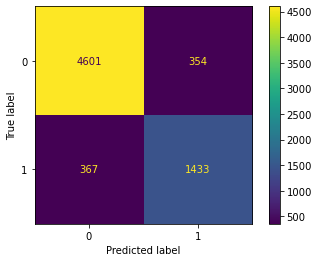

In [31]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [32]:
model = results[-1][9]
results[-1][9],results[-1][9].named_steps['logreg'].best_estimator_

(Pipeline(steps=[('scaler', StandardScaler()),
                 ('logreg',
                  GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=5,
                               param_grid={'C': [0.9, 1.0, 1.1, 1.2, 1.3],
                                           'class_weight': ['balanced', None],
                                           'max_iter': [1000]},
                               refit='balanced_accuracy',
                               return_train_score=True,
                               scoring='balanced_accuracy'))]),
 LogisticRegression(C=1.1, class_weight='balanced', max_iter=1000))

In [33]:
y_pred = model.predict(X_test)

In [34]:
balanced_accuracy_score(y_test,y_pred), accuracy_score(y_test,y_pred)

(0.874760062787308, 0.8749074759437454)

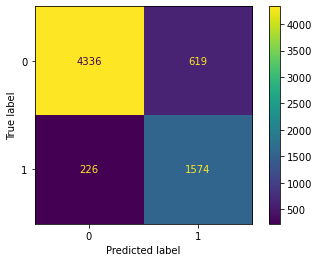

In [35]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

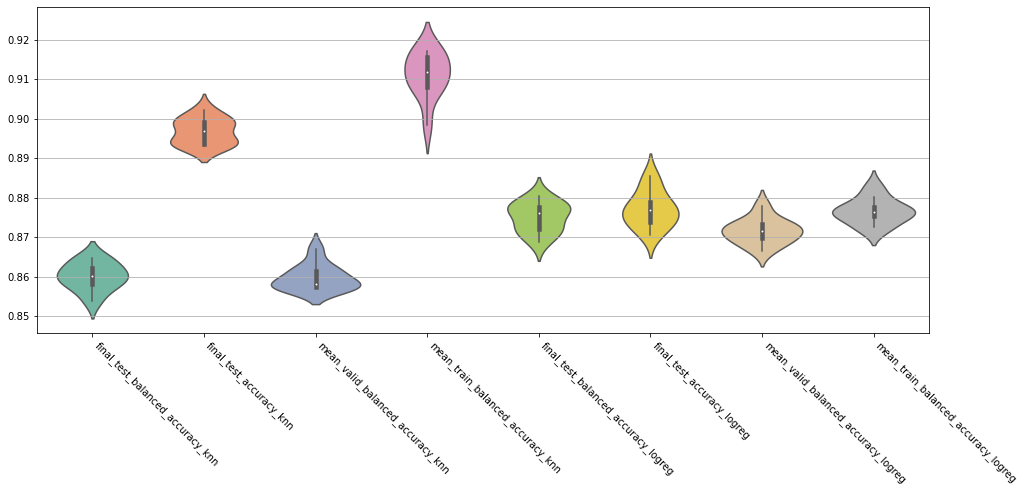

In [36]:
fig, axes = plt.subplots(figsize=(16,6))
sns.violinplot(data=df_results_exp1.iloc[:,1:], palette="Set2", split=True,  ax=axes)

axes.yaxis.grid(True)
void = plt.xticks(rotation=-45,ha="left")

__________________________________________________________________________________
# Comparação final entre todas as rodadas de experimentos

## EXPERIMENTO 1 ==> GridSearchCV() do pipeline ( StandardScaler() + Classificadores )
## EXPERIMENTO 2 ==> Pipeline com StandardScaler() + GridSearchCV( Classificadores )
__________________________________________________________________________________

In [37]:
df_final = df_results_exp1.iloc[:,np.r_[1,1+4,2,2+4]].copy()
df_final = df_final.join(df_results_exp2.iloc[:,np.r_[1,1+4,2,2+4]],rsuffix='_Exp2').copy()
df_final.columns= ['Exp1_KNN_balanced_acc_test_final','Exp1_LogReg_balanced_acc_test_final',
                   'Exp1_KNN_acc_test_final','Exp1_LogReg_acc_test_final',
                   'Exp2_KNN_balanced_acc_test_final','Exp2_LogReg_balanced_acc_test_final'
                   ,'Exp2_KNN_acc_test_final','Exp2_LogReg_acc_test_final',
                  ]

df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Exp1_KNN_balanced_acc_test_final,10.0,0.860094,0.003430,0.853701,0.858180,0.860070,0.862200,0.864620
Exp1_LogReg_balanced_acc_test_final,10.0,0.875027,0.003741,0.868695,0.872077,0.876092,0.877541,0.880441
Exp1_KNN_acc_test_final,10.0,0.896743,0.003263,0.893116,0.893671,0.896743,0.899112,0.902147
Exp1_LogReg_acc_test_final,10.0,0.877084,0.004534,0.870466,0.873760,0.876832,0.878942,0.885418
Exp2_KNN_balanced_acc_test_final,10.0,0.856986,0.007504,0.842033,0.853912,0.858562,0.862825,0.864334
Exp2_LogReg_balanced_acc_test_final,10.0,0.872157,0.007473,0.859704,0.868611,0.874070,0.875859,0.882275
Exp2_KNN_acc_test_final,10.0,0.893856,0.003974,0.887639,0.892191,0.893264,0.896484,0.900074
Exp2_LogReg_acc_test_final,10.0,0.873960,0.006343,0.863805,0.869985,0.874389,0.879867,0.881717


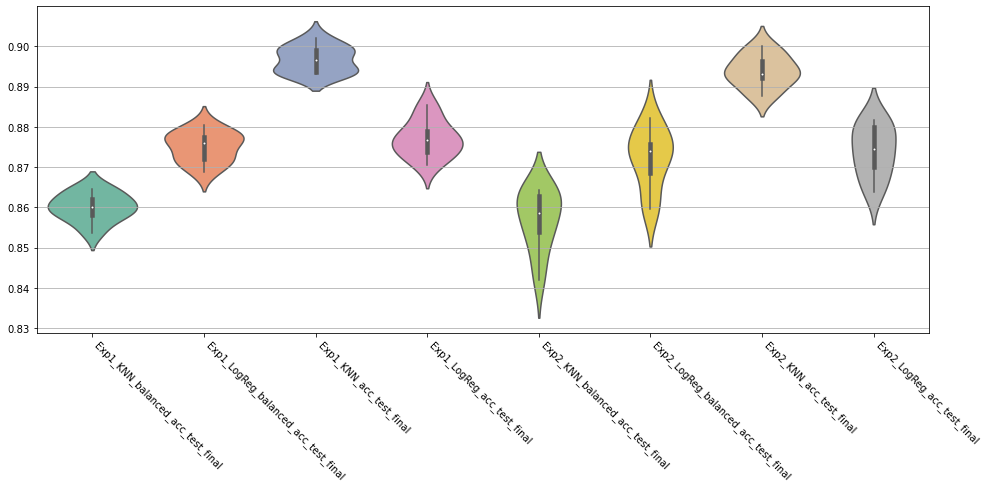

In [38]:
fig, axes = plt.subplots(figsize=(16,6))
sns.violinplot(data=df_final, palette="Set2", split=True,  ax=axes)

axes.yaxis.grid(True)
void = plt.xticks(rotation=-45,ha="left")

# CONCLUSÕES:

Existe uma nítida diferença na estabilidade dos resultados finais no processo treino/validação/teste quando o StandardScaler é utilizado dentro do pipeline (Experimento 1 com menor desvio padrão nos testes finais que o Experimento 2), mesmo que na média final para este problema os resultados sejam semelhantes.

Além disso, é possível ver que existe uma diferença entre a métrica de *accuracy* e *balanced_accuracy* significativa, a qual é provocada pelas classes não balanceadas deste dataset. Um otimizador que busque balancear os resultados das classes tem melhores chances de performar neste problema, como pode ser visto na diferença entre o LogisticRegression e KNN, pois o GridSearchCV() atribuiu em sua escolha o parametro de ***class_weight='balanced'*** para obter melhores resultados no LogisticRegression().

A métrica definida de desempenho também definirá a escolha do classificador, já que o ***KNN*** possui **melhor** *accuracy* e **pior** *balanced_accuracy* que o ***LogisticRegression*** pelos resultados dos experimentos.